<a href="https://colab.research.google.com/github/simkoon/DeepLerningForGarbageClassification/blob/main/%EC%82%AC%EB%B3%B85%EC%9D%B8%EC%85%89%EC%85%98%EC%9D%B4%EA%B1%B0_%EA%B8%80%EB%A1%9C%EB%B2%8C%ED%92%80%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [300, 300]

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/valid'

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:

# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.15)(x)
x = Dense(1024, activation='relu')(x)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# model = Sequential()
 
# Add the vgg convolutional base model
# model.add(inception)
 
# Add new layers
# model.add(GlobalAveragePooling2D())
# model.add(Dense(6, activation='softmax'))

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
!nvidia-smi

Tue Dec  8 03:54:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    34W /  70W |   8803MiB / 15079MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (300, 300),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2199 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/valid',
                                            target_size = (300, 300),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 328 images belonging to 6 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
138/138 [==============================] - 1118s 8s/step - loss: 0.7990 - accuracy: 0.7171 - val_loss: 0.5306 - val_accuracy: 0.8018
Epoch 2/50
138/138 [==============================] - 48s 348ms/step - loss: 0.4754 - accuracy: 0.8286 - val_loss: 0.4414 - val_accuracy: 0.8354
Epoch 3/50
138/138 [==============================] - 48s 348ms/step - loss: 0.4078 - accuracy: 0.8463 - val_loss: 0.4035 - val_accuracy: 0.8567
Epoch 4/50
138/138 [==============================] - 48s 347ms/step - loss: 0.3339 - accuracy: 0.8745 - val_loss: 0.4887 - val_accuracy: 0.8232
Epoch 5/50
138/138 [==============================] - 48s 347ms/step - loss: 0.2947 - accuracy: 0.8868 - val_loss: 0.4656 - val_accuracy: 0.8384
Epoch 6/50
138/138 [==============================] - 48s 348ms/step - loss: 0.2822 - accuracy: 0.8950 - val_loss: 0.3623 - val_accuracy: 0.8628
Epoch 7/50
138/138 [==============================] - 48s 350ms/step - loss: 0.2285 - accuracy: 0.9145 - val_loss: 0.3666 - val_acc

In [ ]:
import matplotlib.pyplot as plt

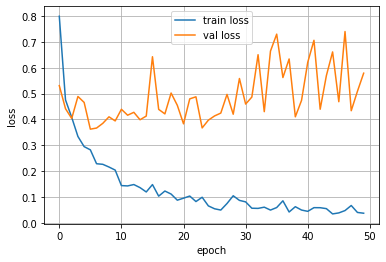

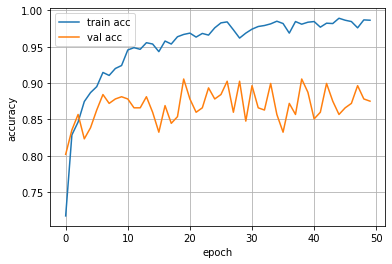

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('LossVal_loss5')
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('AccVal_acc5')
plt.show()


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception5.h5')